In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense,Input,Concatenate,Lambda
from tensorflow.keras.regularizers import l2
import tensorflow.keras as keras
import tensorflow as tf



In [8]:
def f(x,y):
    return -(x*(x-1)+y*(1-y))+ 12*np.cos(x*y) * np.sin(2*x+y)

In [22]:
def draw_comparison(X,Y_pred,f):
    fs= f(X[:,0],X[:,1])
    y_pred= Y_pred.ravel()
    resids= fs-y_pred
    maxi= np.max([np.max(y_pred),np.max(fs)])
    mini= np.min([np.min(y_pred),np.min(fs)])
    fig,axs= plt.subplots(1,3,figsize=(14,6))
    
    im= axs[0].tricontour(X[:,0],X[:,1],Y_pred.ravel(),levels=40,vmin=mini,vmax=maxi)
    plt.colorbar(im)

    im2= axs[1].tricontour(X[:,0],X[:,1],f(X[:,0],X[:,1]),levels=40,vmin=mini,vmax=maxi)
    plt.colorbar(im2)

    im3= axs[2].tricontour(X[:,0],X[:,1],resids,levels=40,cmap='RdPu')
    plt.colorbar(im3)
    
    plt.show()

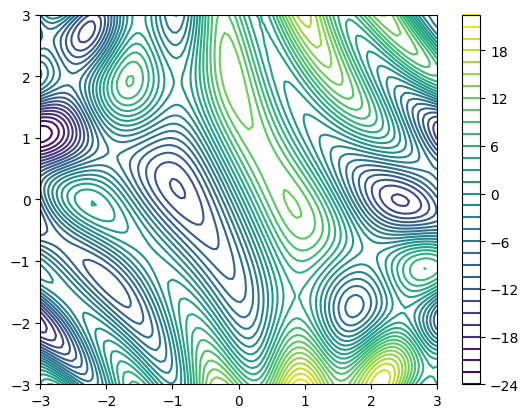

In [10]:
xs= np.linspace(-3,3,100)
ys= np.linspace(-3,3,100)

x_mesh,y_mesh= np.meshgrid(xs,ys)
fs= f(x_mesh,y_mesh)

im= plt.contour(x_mesh,y_mesh,fs,levels=40)
plt.colorbar(im)
plt.show()

In [11]:
X= np.column_stack((x_mesh.ravel(),y_mesh.ravel()))
Y= fs.ravel()


In [12]:
model= Sequential([
    Input((2,)),
    #Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
    Dense(128,activation='sigmoid'),
    #Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    Dense(256,activation='sigmoid'),
    Dense(1)
])

model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.01))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,665 (131.50 KB)

 Trainable params: 33,665 (131.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history= model.fit(X,Y,epochs=20,verbose=1,batch_size=20)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 48.6135
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.4570
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.2811
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.4208
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.7314
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.0420
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9355
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0679
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5729
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2977
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6428
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.5980
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9323
Epoch 14/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.9254
Epoch 15/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [14]:
Y_pred=model.predict(X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


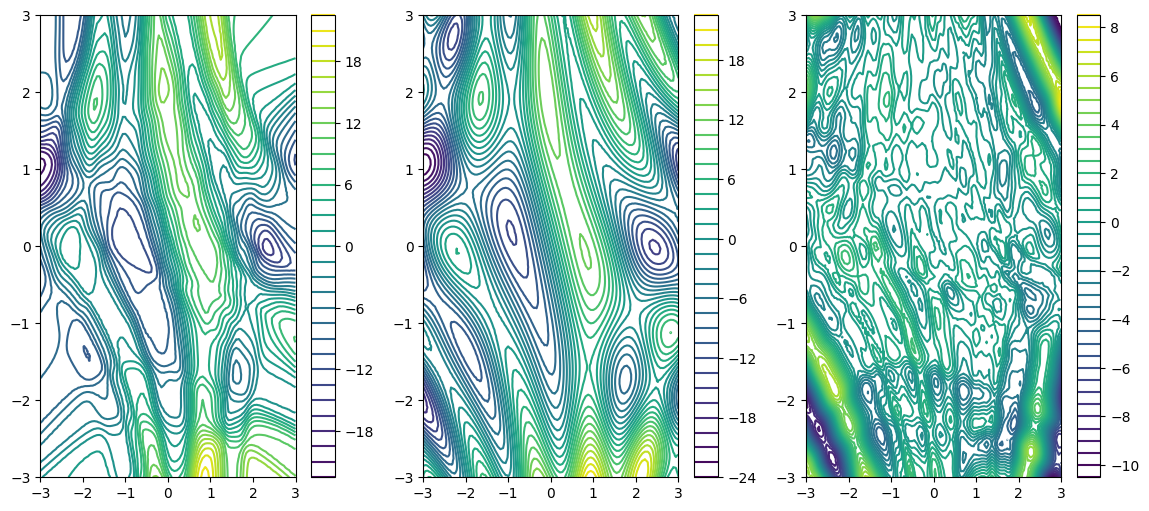

In [21]:
draw_comparison(X,Y_pred,f)

In [17]:
x_p=x_mesh.ravel()
y_p=y_mesh.ravel()
X_poly= np.column_stack((x_p,y_p,x_p**2,y_p**2,x_p*y_p))
Y= fs.ravel()

In [18]:
model2= Sequential([
    Input((5,)),
    #Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
    Dense(128,activation='sigmoid'),
    #Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    Dense(256,activation='sigmoid'),
    Dense(1)
])

model2.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.01))
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,049 (133.00 KB)

 Trainable params: 34,049 (133.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history2=model2.fit(X_poly,Y,epochs=20,batch_size=20)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6979
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5511
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5837
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6707
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9416
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4154
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4541
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5536
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4940
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4569
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1817
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3103
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4686
Epoch 14/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6472
Epoch 15/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


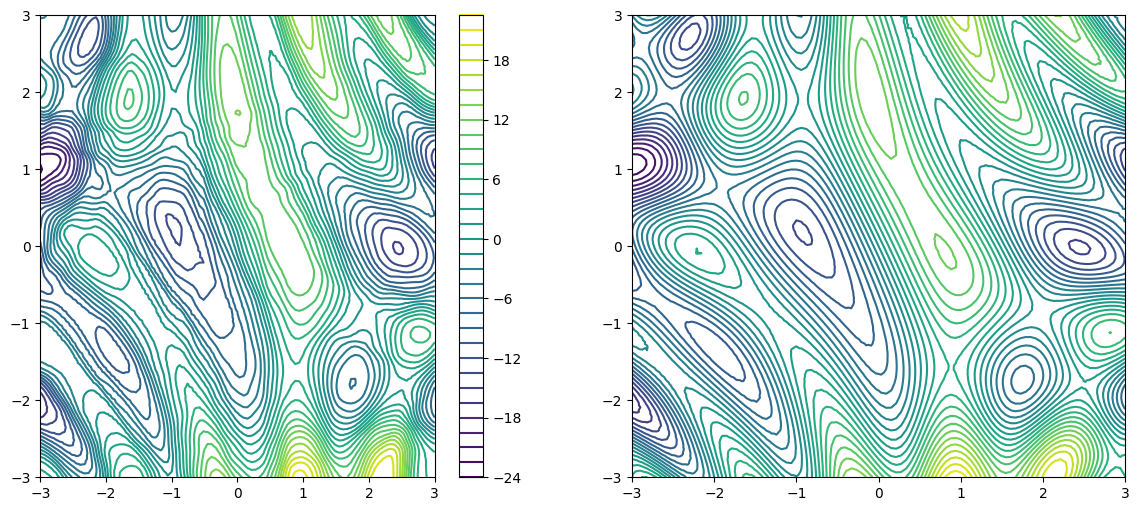

In [22]:
Y_pred2= model2.predict(X_poly)
draw_comparison(X_poly,Y_pred2,f)

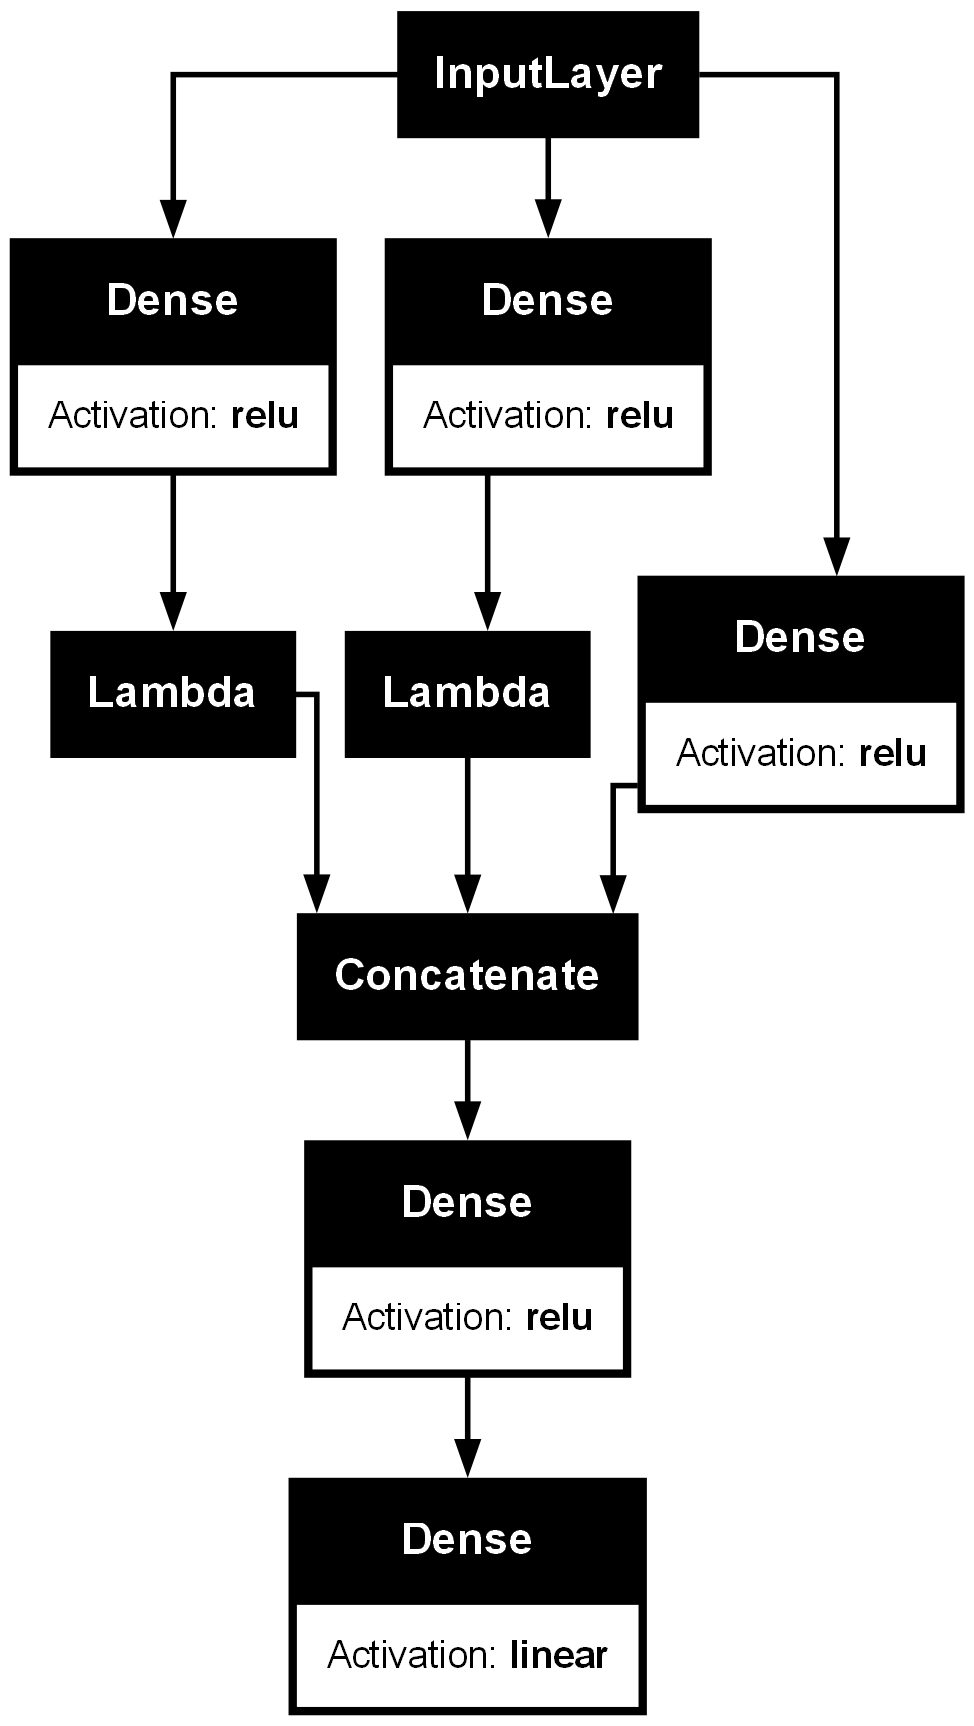

In [44]:
in_layer= Input((5,))

tower1= Dense(64,activation='relu')(in_layer)
tower1= Lambda(lambda x: tf.sin(x),output_shape=(64,))(tower1)

tower2= Dense(64,activation='relu')(in_layer)
tower2= Lambda(lambda x: tf.cos(x),output_shape=(64,))(tower2)

tower3= Dense(64,activation='relu')(in_layer)

x= Concatenate(axis=1)([tower1,tower2,tower3])
x= Dense(64,activation='relu')(x)

out_layer= Dense(1)(x)

model3= Model(in_layer,out_layer)

model3.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001))
keras.utils.plot_model(model3,show_layer_activations=True)


In [45]:
history3=model3.fit(X_poly,Y,epochs=20)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 33.6804
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.1581
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4236
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9406
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9651
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2345
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3860
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2444
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1570
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1233
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0990
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0763
Epoch 13/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0691
Epoch 14/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0760
Epoch 15/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


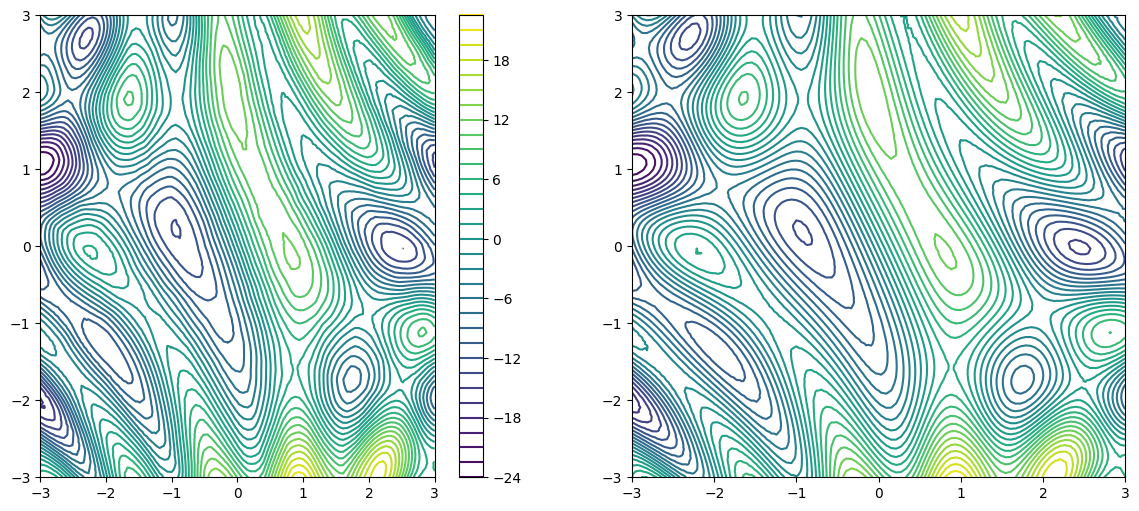

In [46]:
Y_pred= model3.predict(X_poly)
draw_comparison(X_poly,Y_pred,f)